In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,3

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data =pd.read_csv('/Users/max/Downloads/nyc-taxi-trip-duration/train.csv')
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
def month_def(x):
    month = int(x[5:7])
    return month

In [6]:
data['month'] = data['pickup_datetime'].apply(month_def)
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,4


In [7]:
month_grouped = data.groupby('month').count().reset_index()
month_grouped

,month,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,229707,229707,229707,229707,229707,229707,229707,229707,229707,229707,229707
1,2,238300,238300,238300,238300,238300,238300,238300,238300,238300,238300,238300
2,3,256189,256189,256189,256189,256189,256189,256189,256189,256189,256189,256189
3,4,251645,251645,251645,251645,251645,251645,251645,251645,251645,251645,251645
4,5,248487,248487,248487,248487,248487,248487,248487,248487,248487,248487,248487
5,6,234316,234316,234316,234316,234316,234316,234316,234316,234316,234316,234316


In [8]:
max(month_grouped['id'])-min(month_grouped['id'])

26482

#1 Видим как растет популярность услуги такси по месяцам года. Видим
разницу между максимальным и минимальным значением кол-ва поездок.

Text(0.5, 1.0, 'Rides by month')

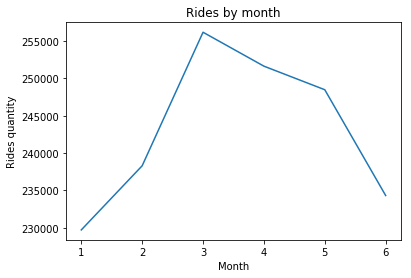

In [9]:
plt.plot(month_grouped['month'], month_grouped['id'])
plt.xlabel('Month')
plt.ylabel('Rides quantity')
plt.title('Rides by month')

#2 Видим как работали две такси компании на протяжении 6 месяцев.

In [31]:
month_vendor = data.groupby(['month', 'vendor_id']).count().reset_index()
month_vendor.head()

,month,vendor_id,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,1,1,105602,105602,105602,105602,105602,105602,105602,105602,105602,105602
1,1,2,124105,124105,124105,124105,124105,124105,124105,124105,124105,124105
2,2,1,110210,110210,110210,110210,110210,110210,110210,110210,110210,110210
3,2,2,128090,128090,128090,128090,128090,128090,128090,128090,128090,128090
4,3,1,118813,118813,118813,118813,118813,118813,118813,118813,118813,118813


In [32]:
month_vendor_filtered = month_vendor.filter(items = ['month', 'vendor_id','id'])
month_vendor_filtered.head()

,month,vendor_id,id
0,1,1,105602
1,1,2,124105
2,2,1,110210
3,2,2,128090
4,3,1,118813


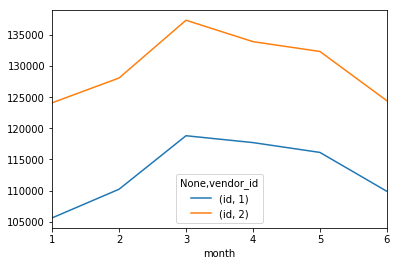

In [30]:
month_vendor_filtered.pivot_table(index = 'month', columns = 'vendor_id').plot()

#3 Видим в какие дни недели люди пользуются такси чаще

In [34]:
from datetime import datetime

In [49]:
def weekday(day):
    date = day[0:10]
    date = datetime.strptime(date, '%Y-%m-%d')
    return date.isoweekday()

In [50]:
data['day'] = data['pickup_datetime'].apply(weekday)
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,7
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,2
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,3
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,6


In [60]:
day_grouped = data.groupby('day').count().reset_index()
day_grouped

,day,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
0,1,187418,187418,187418,187418,187418,187418,187418,187418,187418,187418,187418,187418
1,2,202749,202749,202749,202749,202749,202749,202749,202749,202749,202749,202749,202749
2,3,210136,210136,210136,210136,210136,210136,210136,210136,210136,210136,210136,210136
3,4,218574,218574,218574,218574,218574,218574,218574,218574,218574,218574,218574,218574
4,5,223533,223533,223533,223533,223533,223533,223533,223533,223533,223533,223533,223533
5,6,220868,220868,220868,220868,220868,220868,220868,220868,220868,220868,220868,220868
6,7,195366,195366,195366,195366,195366,195366,195366,195366,195366,195366,195366,195366


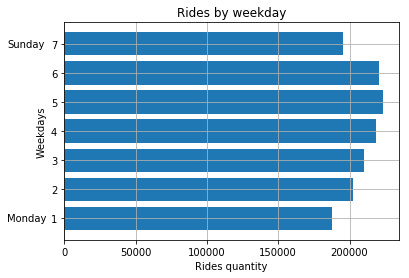

In [69]:
plt.barh(day_grouped['day'], day_grouped['id'])
plt.xlabel('Rides quantity')
plt.ylabel('Weekdays')
plt.title('Rides by weekday')
plt.text(-40000, .9, 'Monday')
plt.text(-40000, 6.9, 'Sunday')
plt.grid()

#4 Поиск корреляции между продолжительностью поездки и кол-вом пассажиров.

In [70]:
import seaborn as sns

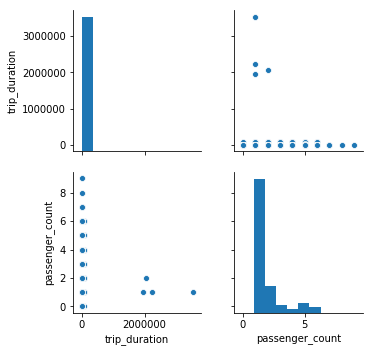

In [72]:
sns_plot = sns.pairplot(
    data[['trip_duration', 'passenger_count']])
sns_plot

#5 Распределение количеств пассажиров в поездках.

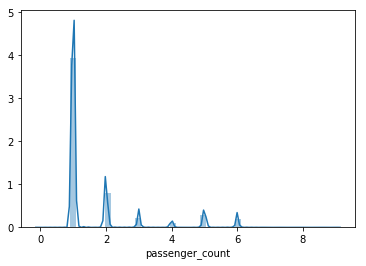

In [73]:
sns.distplot(data.passenger_count)